In [37]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
#Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:
# One hot encoding part
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [43]:
# Create X& Y values
X= insurance_one_hot.drop("charges",axis=1)
y= insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [44]:
# data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
tf.random.set_seed(42)
#create model
insurance_model = tf.keras.Sequential([
     tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(lr=0.01),
                        metrics=["mae"])
# fit the model
history = insurance_model.fit(X_train,y_train,epochs=300,verbose=0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [50]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 445us/step - loss: 3170.9795 - mae: 3170.9795


[3170.9794921875, 3170.9794921875]

Text(0.5, 0, 'epochs')

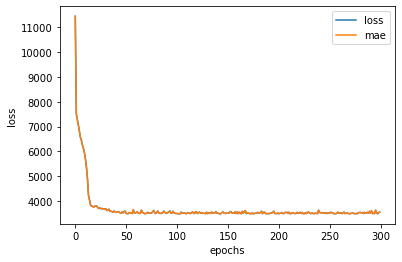

In [52]:

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Processing data ( normalization, standardization)

<AxesSubplot:ylabel='Frequency'>

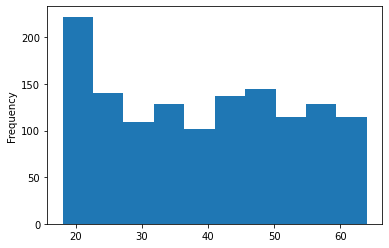

In [56]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

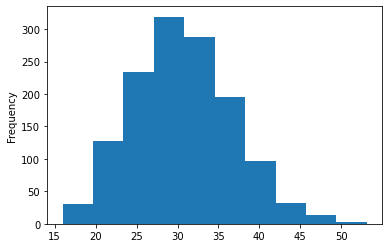

In [57]:
X["bmi"].plot(kind="hist")

In [58]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [65]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create Column Transformer

ct= make_column_transformer(
(MinMaxScaler(),["age","bmi","children"]),
(OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)
# Create X&y
X=insurance.drop("charges",axis=1)
y=insurance["charges"]


# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization(MinMaxScaler and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [68]:
# what our data look like now
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [78]:
# build a neural network model to fit our normalized data
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
insurance_model_4.fit(X_train_normal,y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 559us/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 471us/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 441us/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 441us/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 470us/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/200
34/34 [==============================] - 0s 441us/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 441us/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 470us/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 412us/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 470us/s

34/34 [==============================] - 0s 441us/step - loss: 3719.6870 - mae: 3719.6870
Epoch 78/200
34/34 [==============================] - 0s 441us/step - loss: 3702.9109 - mae: 3702.9109
Epoch 79/200
34/34 [==============================] - 0s 441us/step - loss: 3691.8792 - mae: 3691.8792
Epoch 80/200
34/34 [==============================] - 0s 441us/step - loss: 3682.8350 - mae: 3682.8350
Epoch 81/200
34/34 [==============================] - 0s 441us/step - loss: 3676.9768 - mae: 3676.9768
Epoch 82/200
34/34 [==============================] - 0s 441us/step - loss: 3673.9492 - mae: 3673.9492
Epoch 83/200
34/34 [==============================] - 0s 441us/step - loss: 3667.8452 - mae: 3667.8452
Epoch 84/200
34/34 [==============================] - 0s 471us/step - loss: 3664.5757 - mae: 3664.5757
Epoch 85/200
34/34 [==============================] - 0s 441us/step - loss: 3661.8562 - mae: 3661.8562
Epoch 86/200
34/34 [==============================] - 0s 471us/step - loss: 3660.3049 

34/34 [==============================] - 0s 500us/step - loss: 3538.9231 - mae: 3538.9231
Epoch 157/200
34/34 [==============================] - 0s 471us/step - loss: 3537.4109 - mae: 3537.4109
Epoch 158/200
34/34 [==============================] - 0s 500us/step - loss: 3534.4919 - mae: 3534.4919
Epoch 159/200
34/34 [==============================] - 0s 471us/step - loss: 3532.9490 - mae: 3532.9490
Epoch 160/200
34/34 [==============================] - 0s 471us/step - loss: 3532.6985 - mae: 3532.6985
Epoch 161/200
34/34 [==============================] - 0s 500us/step - loss: 3529.6240 - mae: 3529.6240
Epoch 162/200
34/34 [==============================] - 0s 441us/step - loss: 3529.0964 - mae: 3529.0964
Epoch 163/200
34/34 [==============================] - 0s 500us/step - loss: 3527.5427 - mae: 3527.5427
Epoch 164/200
34/34 [==============================] - 0s 559us/step - loss: 3526.2842 - mae: 3526.2842
Epoch 165/200
34/34 [==============================] - 0s 559us/step - loss: 3

In [79]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 557us/step - loss: 3171.5776 - mae: 3171.5776


[3171.57763671875, 3171.57763671875]